In [106]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Unemploymentdataset

In [108]:
unemp_df = pd.read_excel('C:\\Users\\kiran\\OneDrive\\Desktop\\New folder\\Jobs_work\\Jobs_work\\Lehigh Datasets\\Unemployment\\Unemployment.xls')
# unemp_df.info()

In [109]:
# processing unemployment dataset
unemp_df = unemp_df[6:]


unemp_df.columns = unemp_df.iloc[0]

unemp_df = unemp_df[1:]

unemp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 7 to 3281
Data columns (total 52 columns):
FIPStxt                                      3275 non-null object
State                                        3275 non-null object
Area_name                                    3275 non-null object
Rural_urban_continuum_code_2013              3219 non-null object
Urban_influence_code_2013                    3219 non-null object
Metro_2013                                   3222 non-null object
Civilian_labor_force_2007                    3270 non-null object
Employed_2007                                3270 non-null object
Unemployed_2007                              3270 non-null object
Unemployment_rate_2007                       3270 non-null object
Civilian_labor_force_2008                    3270 non-null object
Employed_2008                                3270 non-null object
Unemployed_2008                              3270 non-null object
Unemployment_rate_2008             

In [110]:
# selecting wanted columns
unemp_dfprocess = pd.concat([unemp_df.iloc[:, 0:6], unemp_df.iloc[:,29], unemp_df.iloc[:, 33], unemp_df.iloc[:, 37], unemp_df.iloc[:, 41], unemp_df.iloc[:, 45],unemp_df.iloc[:, 51]], axis=1) 

unemp_dfprocess.head()

,FIPStxt,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Med_HH_Income_Percent_of_State_Total_2016
7,00000,US,United States,NaN,NaN,NaN,8.07036,7.37523,6.16821,5.28368,4.86919,NaN
8,01000,AL,Alabama,NaN,NaN,NaN,8,7.2,6.8,6.1,5.9,100
9,01001,AL,"Autauga County, AL",2,2,1,6.9,6.2,5.8,5.2,5.1,117.7
10,01003,AL,"Baldwin County, AL",3,2,1,7.5,6.6,6.1,5.5,5.4,121.9
11,01005,AL,"Barbour County, AL",6,6,0,11.5,10.2,10.5,8.9,8.4,71


In [111]:
unemp_dfprocess.columns =['FIPS code', 'State', 'Area_name',  'RUC_2013', 'UIC_2013', 'Metro_2013', 'Uer_2012', 'Uer_2013', 'Uer_2014', 'Uer_2015', 'Uer_2016', 'Medi_inc2016']


unemp_dfprocess[['Uer_2012', 'Uer_2013', 'Uer_2014', 'Uer_2015','Uer_2016']] = unemp_dfprocess[['Uer_2012', 'Uer_2013', 'Uer_2014', 'Uer_2015','Uer_2016']].apply(pd.to_numeric)
unemp_dfprocess['Uer_Avg'] = (unemp_dfprocess['Uer_2012']+unemp_dfprocess['Uer_2013']+unemp_dfprocess['Uer_2014']+unemp_dfprocess['Uer_2015']+unemp_dfprocess['Uer_2016'])/5
unemp_dfprocesscopy = unemp_dfprocess.copy()
unemp_dfprocess.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,Uer_2016,Medi_inc2016,Uer_Avg
7,00000,US,United States,NaN,NaN,NaN,8.070362,7.375232,6.168215,5.28368,4.869192,NaN,6.353336
8,01000,AL,Alabama,NaN,NaN,NaN,8.000000,7.200000,6.800000,6.10000,5.900000,100,6.800000
9,01001,AL,"Autauga County, AL",2,2,1,6.900000,6.200000,5.800000,5.20000,5.100000,117.7,5.840000
10,01003,AL,"Baldwin County, AL",3,2,1,7.500000,6.600000,6.100000,5.50000,5.400000,121.9,6.220000
11,01005,AL,"Barbour County, AL",6,6,0,11.500000,10.200000,10.500000,8.90000,8.400000,71,9.900000


In [112]:
# collecting  national data, Pennsylvania, LehighCounty, Northamptoncounty

unemp_national = unemp_dfprocess[unemp_dfprocess['State']=='US']
unemp_PA = unemp_dfprocess[unemp_dfprocess['Area_name']=='Pennsylvania']
unemp_LC = unemp_dfprocess[unemp_dfprocess['Area_name']=='Lehigh County, PA']
unemp_NC = unemp_dfprocess[unemp_dfprocess['Area_name']=='Northampton County, PA']
unemp_national.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,Uer_2016,Medi_inc2016,Uer_Avg
7,00000,US,United States,NaN,NaN,NaN,8.070362,7.375232,6.168215,5.28368,4.869192,NaN,6.353336


In [113]:
# unemp_dfprocess.to_csv('processed_unempldata.csv', encoding='utf-8', index=False)
unemp_dfprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 7 to 3281
Data columns (total 13 columns):
FIPS code       3275 non-null object
State           3275 non-null object
Area_name       3275 non-null object
RUC_2013        3219 non-null object
UIC_2013        3219 non-null object
Metro_2013      3222 non-null object
Uer_2012        3272 non-null float64
Uer_2013        3272 non-null float64
Uer_2014        3272 non-null float64
Uer_2015        3272 non-null float64
Uer_2016        3272 non-null float64
Medi_inc2016    3192 non-null object
Uer_Avg         3272 non-null float64
dtypes: float64(6), object(7)
memory usage: 332.7+ KB


In [114]:
# creating newcolumn which has the average of all

unemp_dfprocess_copy = unemp_dfprocess.copy()
unemp_dfprocess = unemp_dfprocess.dropna()

In [115]:
# reset indexes
unemp_dfprocess = unemp_dfprocess.reset_index(drop=True)
unemp_dfprocess.head()
# ed_dfprocess.columns = ['FIPS code', 'State', 'Area_name',  'RUC_2013', 'UIC_2013','Metro_2013','Uer_2012','Uer_201','Uer_201', 'Uer_201','Uer_201','HSD_%']

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,Uer_2016,Medi_inc2016,Uer_Avg
0,01001,AL,"Autauga County, AL",2,2,1,6.9,6.2,5.8,5.2,5.1,117.7,5.84
1,01003,AL,"Baldwin County, AL",3,2,1,7.5,6.6,6.1,5.5,5.4,121.9,6.22
2,01005,AL,"Barbour County, AL",6,6,0,11.5,10.2,10.5,8.9,8.4,71,9.90
3,01007,AL,"Bibb County, AL",1,1,1,8.5,7.9,7.2,6.6,6.5,93,7.34
4,01009,AL,"Blount County, AL",1,1,1,6.9,6.3,6.1,5.4,5.4,102,6.02


In [116]:
unemp_dfprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
FIPS code       3141 non-null object
State           3141 non-null object
Area_name       3141 non-null object
RUC_2013        3141 non-null object
UIC_2013        3141 non-null object
Metro_2013      3141 non-null object
Uer_2012        3141 non-null float64
Uer_2013        3141 non-null float64
Uer_2014        3141 non-null float64
Uer_2015        3141 non-null float64
Uer_2016        3141 non-null float64
Medi_inc2016    3141 non-null object
Uer_Avg         3141 non-null float64
dtypes: float64(6), object(7)
memory usage: 319.1+ KB


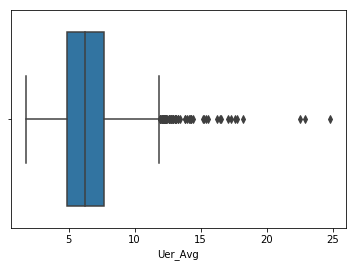

In [117]:
# Uer_dfstats = unemp_dfprocess.drop(['FIPS code', 'State','Area_name','RUC_2013','UIC_2013','Metro_2013'], axis=1)
Uer_dfstats =  pd.concat([unemp_dfprocess.iloc[:,11:13]], axis=1)
sns.boxplot(x=Uer_dfstats['Uer_Avg'])

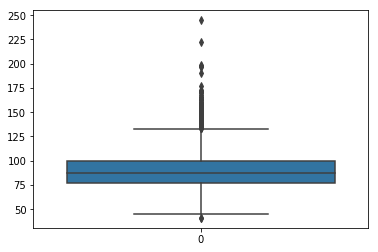

In [118]:
sns.boxplot(data=Uer_dfstats['Medi_inc2016'])

In [119]:
Q1 = unemp_dfprocess[['Uer_Avg']].quantile(0.25) 
Q3 = unemp_dfprocess[['Uer_Avg']].quantile(0.75) 
IQR = Q3 - Q1
((Uer_dfstats[['Uer_Avg']] < (Q1 - 1.5 * IQR)) | (Uer_dfstats[['Uer_Avg']] > (Q3 + 1.5 * IQR))).sum()

Uer_Avg    63
dtype: int64

In [120]:
q = unemp_dfprocess['Uer_Avg'].quantile(0.99)
unemp_dfprocess = unemp_dfprocess[unemp_dfprocess['Uer_Avg']<q]

In [121]:
Q1 = unemp_dfprocess['Medi_inc2016'].quantile(0.25) 
Q3 = unemp_dfprocess['Medi_inc2016'].quantile(0.75) 
IQR = Q3 - Q1
((Uer_dfstats['Medi_inc2016'] < (Q1 - 1.5 * IQR)) | (Uer_dfstats['Medi_inc2016'] > (Q3 + 1.5 * IQR))).sum()
q = unemp_dfprocess['Medi_inc2016'].quantile(0.99)
unemp_dfprocess = unemp_dfprocess[unemp_dfprocess['Medi_inc2016']<q]

In [122]:
unemp_dfprocess = unemp_dfprocess.reset_index(drop=True)

In [123]:
unemp_dfprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 13 columns):
FIPS code       3077 non-null object
State           3077 non-null object
Area_name       3077 non-null object
RUC_2013        3077 non-null object
UIC_2013        3077 non-null object
Metro_2013      3077 non-null object
Uer_2012        3077 non-null float64
Uer_2013        3077 non-null float64
Uer_2014        3077 non-null float64
Uer_2015        3077 non-null float64
Uer_2016        3077 non-null float64
Medi_inc2016    3077 non-null object
Uer_Avg         3077 non-null float64
dtypes: float64(6), object(7)
memory usage: 312.6+ KB


In [124]:
Uer_dfstats['Uer_Avg'].min()

1.7600000000000002

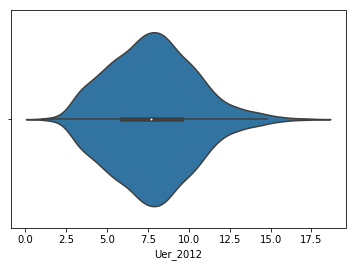

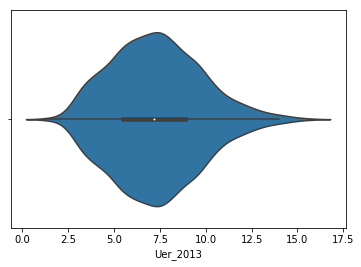

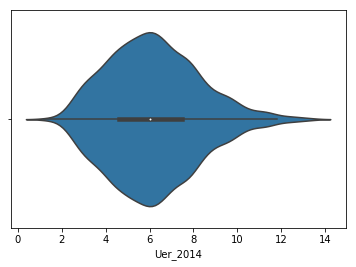

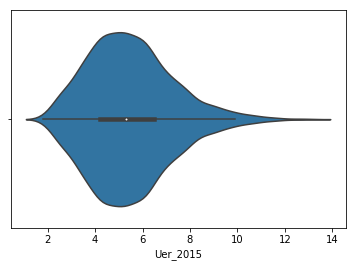

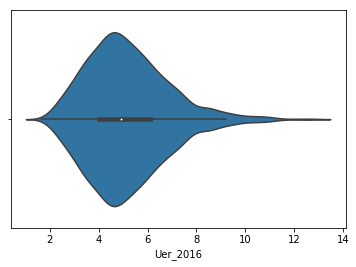

7.783555411114724
7.297107572310674
6.172635684107907
5.465908352291196
5.166915827104322


In [125]:
# overall Unemployment rate; results
sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2012, errors='ignore'))
plt.show()

sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2013, errors='ignore'))
plt.show()

sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2014, errors='ignore'))
plt.show()

sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2015, errors='ignore'))
plt.show()

sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2016, errors='ignore'))
plt.show()

print(unemp_dfprocess['Uer_2012'].mean())
print(unemp_dfprocess['Uer_2013'].mean())
print(unemp_dfprocess['Uer_2014'].mean())
print(unemp_dfprocess['Uer_2015'].mean())
print(unemp_dfprocess['Uer_2016'].mean())

In [126]:
# sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2012, errors='ignore'))
# plt.show()

# sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2013, errors='ignore'))
# plt.show()

# sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2014, errors='ignore'))
# plt.show()

# sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2015, errors='ignore'))
# plt.show()

# sns.violinplot(pd.to_numeric(unemp_dfprocess.Uer_2016, errors='ignore'))
# plt.show()

# print(unemp_dfprocess['Uer_2012'].mean())
# print(unemp_dfprocess['Uer_2013'].mean())
# print(unemp_dfprocess['Uer_2014'].mean())
# print(unemp_dfprocess['Uer_2015'].mean())
# print(unemp_dfprocess['Uer_2016'].mean())

## Education

In [127]:
ed_df = pd.read_excel('C:\\Users\\kiran\\OneDrive\\Desktop\\New folder\\Jobs_work\\Jobs_work\\Lehigh Datasets\\Education\\Education.xls')

In [128]:
ed_df = ed_df[3:]
ed_df.columns = ed_df.iloc[0]
ed_df = ed_df[1:]
ed_df.head()
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 4 to 3286
Data columns (total 47 columns):
FIPS Code                                                                     3283 non-null object
State                                                                         3283 non-null object
Area name                                                                     3283 non-null object
2003 Rural-urban Continuum Code                                               3221 non-null object
2003 Urban Influence Code                                                     3221 non-null object
2013 Rural-urban Continuum Code                                               3221 non-null object
2013 Urban Influence Code                                                     3221 non-null object
Less than a high school diploma, 1970                                         3186 non-null object
High school diploma only, 1970                                                3186 non-null object
So

In [129]:
ed_dfprocess = pd.concat([ed_df.iloc[:,0:3],ed_df.iloc[:,5:7], ed_df.iloc[:,39:45]], axis=1)

In [130]:
# ed_dfprocess.head()


In [131]:
ed_dfprocess.columns = ['FIPS code', 'State', 'Area_name',  'RUC_2013', 'UIC_2013','LHD','HSD','ABD', 'BDH','LHD_%','HSD_%']
ed_dfprocesscopy = ed_dfprocess.copy()
ed_dfprocesscopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 4 to 3286
Data columns (total 11 columns):
FIPS code    3283 non-null object
State        3283 non-null object
Area_name    3283 non-null object
RUC_2013     3221 non-null object
UIC_2013     3221 non-null object
LHD          3273 non-null object
HSD          3273 non-null object
ABD          3273 non-null object
BDH          3273 non-null object
LHD_%        3273 non-null object
HSD_%        3273 non-null object
dtypes: object(11)
memory usage: 282.2+ KB


In [132]:
ed_dfprocess['ABD_%'] = 100*ed_dfprocess['ABD']/(ed_dfprocess['LHD']+ed_dfprocess['HSD']+ed_dfprocess['ABD']+ed_dfprocess['BDH'])
ed_dfprocess['BDH_%'] = 100*ed_dfprocess['BDH']/(ed_dfprocess['LHD']+ed_dfprocess['HSD']+ed_dfprocess['ABD']+ed_dfprocess['BDH'])


In [133]:
# collecting  national data, Pennsylvania, LehighCounty, Northamptoncounty
ed_national = ed_dfprocess[ed_dfprocess['State']=='US']
ed_PA = ed_dfprocess[ed_dfprocess['Area_name']=='Pennsylvania']
ed_LC = ed_dfprocess[ed_dfprocess['Area_name']=='Lehigh County']
ed_NC = ed_dfprocess[ed_dfprocess['Area_name']=='Northampton County']
ed_PA

,FIPS code,State,Area_name,RUC_2013,UIC_2013,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
2295,42000,PA,Pennsylvania,NaN,NaN,925686,3183249,2144961,2595950,10.46,35.97,24.2373,29.3333


In [134]:
ed_dfprocess = ed_dfprocess.drop(['LHD', 'HSD', 'ABD', 'BDH'], axis =1)
# ed_dfprocess.to_csv('processedEducationData.csv', encoding='utf-8', index=False)
ed_dfprocess_copy = ed_dfprocess.copy()
ed_dfprocess.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,LHD_%,HSD_%,ABD_%,BDH_%
4,00000,US,United States,NaN,NaN,13.021,27.531,29.1331,30.315
5,01000,AL,Alabama,NaN,NaN,15.209,30.956,29.8246,24.0104
6,01001,AL,Autauga County,2,2,12.417,34.331,28.6596,24.5928
7,01003,AL,Baldwin County,3,2,9.972,28.692,31.788,29.5471
8,01005,AL,Barbour County,6,6,26.236,34.927,25.9694,12.8678


In [135]:
ed_dfprocess_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 4 to 3286
Data columns (total 9 columns):
FIPS code    3283 non-null object
State        3283 non-null object
Area_name    3283 non-null object
RUC_2013     3221 non-null object
UIC_2013     3221 non-null object
LHD_%        3273 non-null object
HSD_%        3273 non-null object
ABD_%        3273 non-null object
BDH_%        3273 non-null object
dtypes: object(9)
memory usage: 230.9+ KB


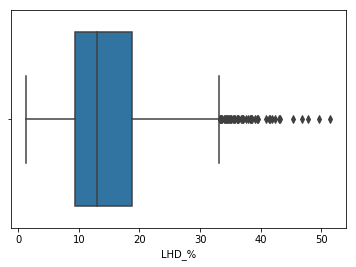

In [136]:
# outliers
ed_dfstats =  pd.concat([ed_dfprocess.iloc[:,5:9]], axis=1)
ed_dfstats[['LHD_%','HSD_%','ABD_%','BDH_%']]=ed_dfstats[['LHD_%','HSD_%','ABD_%','BDH_%']].apply(pd.to_numeric)
sns.boxplot(x=ed_dfstats['LHD_%'])

In [137]:
Q1 = ed_dfprocess['LHD_%'].quantile(0.25) 
Q3 = ed_dfprocess['LHD_%'].quantile(0.75) 
IQR = Q3 - Q1
print(((ed_dfstats[['LHD_%']] < (Q1 - 1.5 * IQR)) | (ed_dfstats[['LHD_%']] > (Q3 + 1.5 * IQR))).sum())

q = ed_dfprocess['LHD_%'].quantile(0.99)
ed_dfprocess = ed_dfprocess[ed_dfprocess['LHD_%']<q]

LHD_%    49
dtype: int64


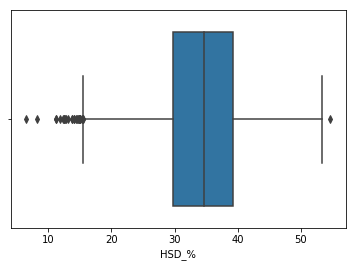

In [138]:
sns.boxplot(x=ed_dfstats['HSD_%'])

In [139]:
Q1 = ed_dfprocess['HSD_%'].quantile(0.25) 
Q3 = ed_dfprocess['HSD_%'].quantile(0.75) 
IQR = Q3 - Q1
print(((ed_dfstats[['HSD_%']] < (Q1 - 1.5 * IQR)) | (ed_dfstats[['HSD_%']] > (Q3 + 1.5 * IQR))).sum())

q = ed_dfprocess['HSD_%'].quantile(0.99)
ed_dfprocess = ed_dfprocess[ed_dfprocess['HSD_%']<q]

HSD_%    26
dtype: int64


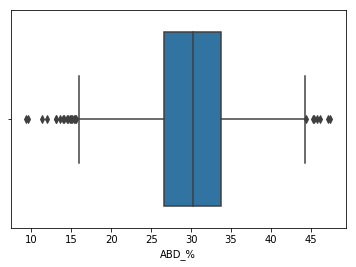

In [140]:
sns.boxplot(x=ed_dfstats['ABD_%'])

In [141]:
Q1 = ed_dfprocess['ABD_%'].quantile(0.25) 
Q3 = ed_dfprocess['ABD_%'].quantile(0.75) 
IQR = Q3 - Q1
print(((ed_dfstats[['ABD_%']] < (Q1 - 1.5 * IQR)) | (ed_dfstats[['ABD_%']] > (Q3 + 1.5 * IQR))).sum())

q = ed_dfprocess['ABD_%'].quantile(0.99)
ed_dfprocess = ed_dfprocess[ed_dfprocess['ABD_%']<q]

ABD_%    28
dtype: int64


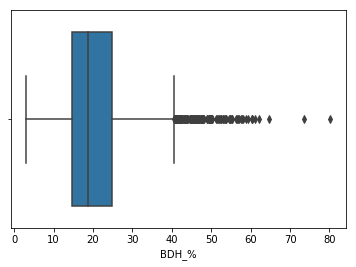

In [142]:
sns.boxplot(x=ed_dfstats['BDH_%'])

In [143]:
Q1 = ed_dfprocess['BDH_%'].quantile(0.25) 
Q3 = ed_dfprocess['BDH_%'].quantile(0.75) 
IQR = Q3 - Q1
print(((ed_dfstats[['BDH_%']] < (Q1 - 1.5 * IQR)) | (ed_dfstats[['BDH_%']] > (Q3 + 1.5 * IQR))).sum())

q = ed_dfprocess['BDH_%'].quantile(0.99)
ed_dfprocess = ed_dfprocess[ed_dfprocess['BDH_%']<q]

BDH_%    131
dtype: int64


In [144]:
ed_dfprocess = ed_dfprocess.dropna()

In [145]:
ed_dfprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 6 to 3286
Data columns (total 9 columns):
FIPS code    3090 non-null object
State        3090 non-null object
Area_name    3090 non-null object
RUC_2013     3090 non-null object
UIC_2013     3090 non-null object
LHD_%        3090 non-null object
HSD_%        3090 non-null object
ABD_%        3090 non-null object
BDH_%        3090 non-null object
dtypes: object(9)
memory usage: 241.4+ KB


## Combining Datasets basing on FIPS code

In [146]:
# rows = list(ed_dfprocess[ed_dfprocess['FIPS code'] != unemp_dfprocess['FIPS code']].index)

# assert_frame_equal(unemp_dfprocess.iloc[:, 0:1], ed_dfprocess.iloc[:, 0:1], check_dtype=False)

In [147]:
ed_dfprocess_edit = ed_dfprocess.drop(['State','Area_name', 'RUC_2013', 'UIC_2013'], axis =1)
merge_df = pd.merge(unemp_dfprocess, ed_dfprocess_edit, on="FIPS code",  how='inner', suffixes=('_',''))
merge_df.head()

ed_nationaledit = ed_national.drop(['State','Area_name', 'RUC_2013', 'UIC_2013'], axis =1)
merge_national = pd.merge(unemp_national, ed_nationaledit, on="FIPS code",  how='inner', suffixes=('_',''))
merge_df.head()



ed_PAedit = ed_PA.drop(['State','Area_name', 'RUC_2013', 'UIC_2013'], axis =1)
merge_PA = pd.merge(unemp_PA, ed_PAedit, on="FIPS code",  how='inner', suffixes=('_',''))
merge_PA.head()


ed_LCedit = ed_LC.drop(['State','Area_name', 'RUC_2013', 'UIC_2013'], axis =1)
merge_LC = pd.merge(unemp_LC, ed_LCedit, on="FIPS code",  how='inner', suffixes=('_',''))
merge_LC.head()

ed_NCedit = ed_NC.drop(['State','Area_name', 'RUC_2013', 'UIC_2013'], axis =1)
merge_NC = pd.merge(unemp_NC, ed_NCedit, on="FIPS code",  how='inner', suffixes=('_',''))
merge_NC.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,...,Medi_inc2016,Uer_Avg,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
0,42095,PA,"Northampton County, PA",2,2,1,8.1,7.4,5.9,5.3,...,115.5,6.38,19950,73199,57102,58066,9.577,35.138,27.4111,27.8739


In [148]:
unemp_NC.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,Uer_2016,Medi_inc2016,Uer_Avg
2340,42095,PA,"Northampton County, PA",2,2,1,8.1,7.4,5.9,5.3,5.2,115.5,6.38


In [149]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2971
Data columns (total 17 columns):
FIPS code       2972 non-null object
State           2972 non-null object
Area_name       2972 non-null object
RUC_2013        2972 non-null object
UIC_2013        2972 non-null object
Metro_2013      2972 non-null object
Uer_2012        2972 non-null float64
Uer_2013        2972 non-null float64
Uer_2014        2972 non-null float64
Uer_2015        2972 non-null float64
Uer_2016        2972 non-null float64
Medi_inc2016    2972 non-null object
Uer_Avg         2972 non-null float64
LHD_%           2972 non-null object
HSD_%           2972 non-null object
ABD_%           2972 non-null object
BDH_%           2972 non-null object
dtypes: float64(6), object(11)
memory usage: 417.9+ KB


In [150]:
# merge_df.to_csv('combined_dataset.csv', encoding='utf-8', index=False)
merge_df.isnull().sum()
merge_df = merge_df[(merge_df.RUC_2013.notnull()) & (merge_df.RUC_2013.notnull())]
merge_df

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,Uer_2016,Medi_inc2016,Uer_Avg,LHD_%,HSD_%,ABD_%,BDH_%
0,01001,AL,"Autauga County, AL",2,2,1,6.9,6.2,5.8,5.2,5.1,117.7,5.84,12.417,34.331,28.6596,24.5928
1,01003,AL,"Baldwin County, AL",3,2,1,7.5,6.6,6.1,5.5,5.4,121.9,6.22,9.972,28.692,31.788,29.5471
2,01005,AL,"Barbour County, AL",6,6,0,11.5,10.2,10.5,8.9,8.4,71,9.90,26.236,34.927,25.9694,12.8678
3,01007,AL,"Bibb County, AL",1,1,1,8.5,7.9,7.2,6.6,6.5,93,7.34,19.302,41.816,26.8825,12
4,01009,AL,"Blount County, AL",1,1,1,6.9,6.3,6.1,5.4,5.4,102,6.02,19.969,32.942,34.0393,13.0498
5,01011,AL,"Bullock County, AL",6,6,0,10.4,9.4,8.8,7.9,6.9,74,8.68,33.438,34.147,22.1601,10.255
6,01013,AL,"Butler County, AL",6,6,0,11.5,10.3,8.5,7.6,6.9,76.5,8.96,18.94,39.852,25.1272,16.08
7,01015,AL,"Calhoun County, AL",3,2,1,8.9,8.8,8.0,7.0,6.6,90.2,7.86,17.663,32.072,32.6121,17.653
8,01017,AL,"Chambers County, AL",6,5,0,9.9,8.0,6.7,6.1,5.5,85.4,7.24,19.737,39.411,28.3684,12.4843
9,01019,AL,"Cherokee County, AL",6,6,0,8.0,6.6,5.8,5.5,5.1,89.5,6.20,18.717,35.958,31.363,13.9617


In [151]:
merge_df = merge_df.dropna()
merge_df = merge_df.reset_index(drop=True)
merge_data = pd.concat([merge_df.iloc[:,4],merge_df.iloc[:,11:15]], axis =1)

In [152]:
data__array = merge_data.values

In [153]:
data__array.max(axis = 0)

array([12, 152.7, 12.9, 35.116, 49.331], dtype=object)

In [154]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 17 columns):
FIPS code       2972 non-null object
State           2972 non-null object
Area_name       2972 non-null object
RUC_2013        2972 non-null object
UIC_2013        2972 non-null object
Metro_2013      2972 non-null object
Uer_2012        2972 non-null float64
Uer_2013        2972 non-null float64
Uer_2014        2972 non-null float64
Uer_2015        2972 non-null float64
Uer_2016        2972 non-null float64
Medi_inc2016    2972 non-null object
Uer_Avg         2972 non-null float64
LHD_%           2972 non-null object
HSD_%           2972 non-null object
ABD_%           2972 non-null object
BDH_%           2972 non-null object
dtypes: float64(6), object(11)
memory usage: 394.8+ KB


In [155]:
# convert columns from object to numeric
merge_df[['UIC_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']] = merge_df[['UIC_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']].apply(pd.to_numeric)
Unemp = merge_df.groupby('UIC_2013')['Uer_Avg'].mean()
ABD = merge_df.groupby('UIC_2013')['ABD_%'].mean()
LHD = merge_df.groupby('UIC_2013')['LHD_%'].mean()
HSD = merge_df.groupby('UIC_2013')['HSD_%'].mean()
BDH = merge_df.groupby('UIC_2013')['BDH_%'].mean()
sorted_Merge = pd.concat([ABD, LHD], axis=1)
# converting series objects to dataframes
Unemp = Unemp.to_frame().reset_index()
ABD = ABD.to_frame().reset_index()
LHD = LHD.to_frame().reset_index()
HSD = HSD.to_frame().reset_index()
BDH = BDH.to_frame().reset_index()
sorted_Merge = pd.concat([Unemp, LHD.iloc[:,1], HSD.iloc[:,1],ABD.iloc[:,1], BDH.iloc[:,1] ], axis=1)

In [156]:
sorted_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
UIC_2013    12 non-null int64
Uer_Avg     12 non-null float64
LHD_%       12 non-null float64
HSD_%       12 non-null float64
ABD_%       12 non-null float64
BDH_%       12 non-null float64
dtypes: float64(5), int64(1)
memory usage: 656.0 bytes


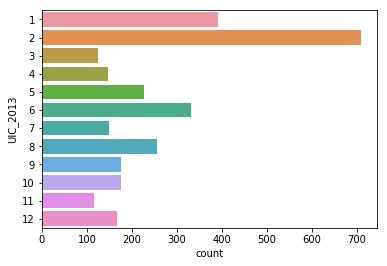

In [157]:
sns.countplot(y='UIC_2013', data=merge_df)

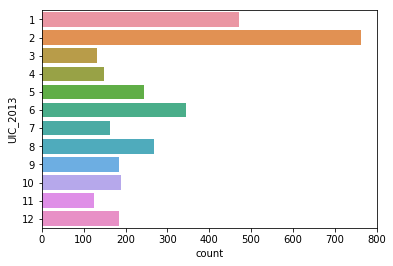

In [158]:
oldmerge_df = pd.merge(unemp_dfprocess_copy,ed_dfprocess_copy, on="FIPS code",  how='inner', suffixes=('_',''))
sns.countplot(y='UIC_2013', data=oldmerge_df)

In [159]:
oldmerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275 entries, 0 to 3274
Data columns (total 21 columns):
FIPS code       3275 non-null object
State_          3275 non-null object
Area_name_      3275 non-null object
RUC_2013_       3219 non-null object
UIC_2013_       3219 non-null object
Metro_2013      3222 non-null object
Uer_2012        3272 non-null float64
Uer_2013        3272 non-null float64
Uer_2014        3272 non-null float64
Uer_2015        3272 non-null float64
Uer_2016        3272 non-null float64
Medi_inc2016    3192 non-null object
Uer_Avg         3272 non-null float64
State           3275 non-null object
Area_name       3275 non-null object
RUC_2013        3219 non-null object
UIC_2013        3219 non-null object
LHD_%           3272 non-null object
HSD_%           3272 non-null object
ABD_%           3272 non-null object
BDH_%           3272 non-null object
dtypes: float64(6), object(15)
memory usage: 722.9+ KB


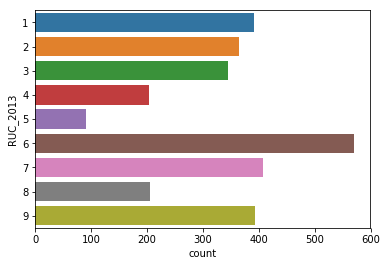

In [160]:
sns.countplot(y='RUC_2013', data=merge_df)

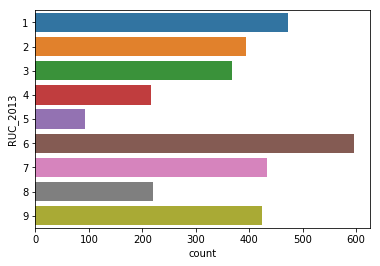

In [161]:
sns.countplot(y='RUC_2013', data=oldmerge_df)

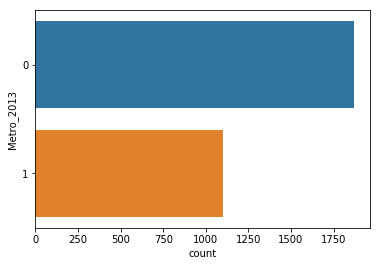

In [162]:
sns.countplot(y='Metro_2013', data=merge_df)

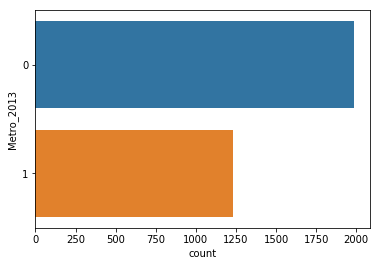

In [163]:
sns.countplot(y='Metro_2013', data=oldmerge_df)

In [164]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 17 columns):
FIPS code       2972 non-null object
State           2972 non-null object
Area_name       2972 non-null object
RUC_2013        2972 non-null object
UIC_2013        2972 non-null int64
Metro_2013      2972 non-null object
Uer_2012        2972 non-null float64
Uer_2013        2972 non-null float64
Uer_2014        2972 non-null float64
Uer_2015        2972 non-null float64
Uer_2016        2972 non-null float64
Medi_inc2016    2972 non-null object
Uer_Avg         2972 non-null float64
LHD_%           2972 non-null float64
HSD_%           2972 non-null float64
ABD_%           2972 non-null float64
BDH_%           2972 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 394.8+ KB


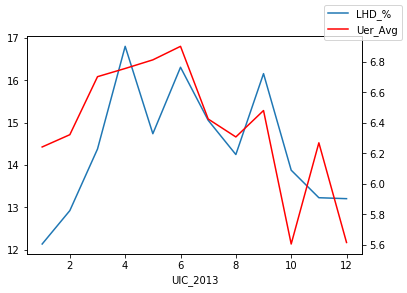

In [165]:
import matplotlib.pyplot as plt

# ABD.plot(ax=plt.gca()) #no need to specify for first axis
ax = sorted_Merge.plot(x="UIC_2013", y="LHD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

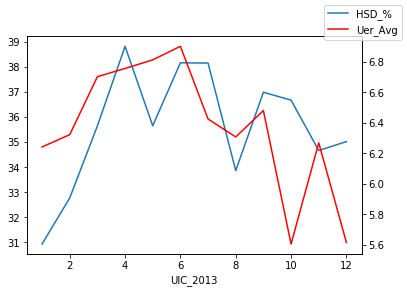

In [166]:
# plt.subplot(2,2,2)
# LHD.plot(ax=plt.gca())
ax = sorted_Merge.plot(x="UIC_2013", y="HSD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

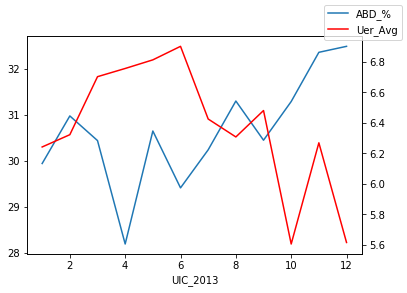

In [167]:
# plt.subplot(2,2,3)
# HSD.plot(ax=plt.gca())
ax = sorted_Merge.plot(x="UIC_2013", y="ABD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

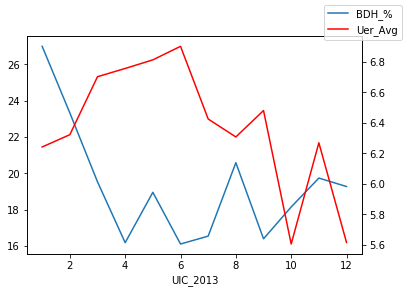

In [168]:
# plt.subplot(2,2,4)
# BDH.plot(ax=plt.gca())
ax = sorted_Merge.plot(x="UIC_2013", y="BDH_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [169]:
sorted_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
UIC_2013    12 non-null int64
Uer_Avg     12 non-null float64
LHD_%       12 non-null float64
HSD_%       12 non-null float64
ABD_%       12 non-null float64
BDH_%       12 non-null float64
dtypes: float64(5), int64(1)
memory usage: 656.0 bytes


In [170]:
sorted_Merge["L"] = sorted_Merge["LHD_%"] + sorted_Merge["HSD_%"]   

sorted_Merge["H"] = sorted_Merge["ABD_%"] + sorted_Merge["BDH_%"]   

In [171]:
sorted_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
UIC_2013    12 non-null int64
Uer_Avg     12 non-null float64
LHD_%       12 non-null float64
HSD_%       12 non-null float64
ABD_%       12 non-null float64
BDH_%       12 non-null float64
L           12 non-null float64
H           12 non-null float64
dtypes: float64(7), int64(1)
memory usage: 848.0 bytes


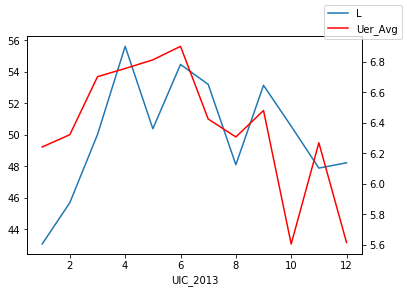

In [172]:
# plt.subplot(2,2,4)
# BDH.plot(ax=plt.gca())
ax = sorted_Merge.plot(x="UIC_2013", y="L", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

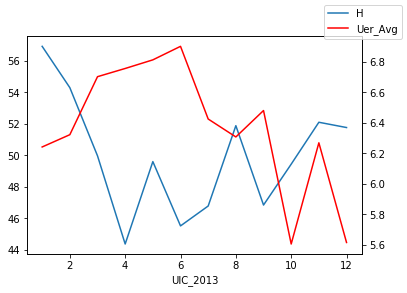

In [173]:
# plt.subplot(2,2,4)
# BDH.plot(ax=plt.gca())
ax = sorted_Merge.plot(x="UIC_2013", y="H", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="UIC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [174]:

# convert columns from object to numeric
merge_df[['RUC_2013','Metro_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']] = merge_df[['RUC_2013','Metro_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']].apply(pd.to_numeric)
Unemp = merge_df.groupby('RUC_2013')['Uer_Avg'].mean()
ABD = merge_df.groupby('RUC_2013')['ABD_%'].mean()
LHD = merge_df.groupby('RUC_2013')['LHD_%'].mean()
HSD = merge_df.groupby('RUC_2013')['HSD_%'].mean()
BDH = merge_df.groupby('RUC_2013')['BDH_%'].mean()
sorted_Merge = pd.concat([ABD, LHD], axis=1)
# converting series objects to dataframes
Unemp = Unemp.to_frame().reset_index()
ABD = ABD.to_frame().reset_index()
LHD = LHD.to_frame().reset_index()
HSD = HSD.to_frame().reset_index()
BDH = BDH.to_frame().reset_index()
sorted_Merge = pd.concat([Unemp, LHD.iloc[:,1], HSD.iloc[:,1],ABD.iloc[:,1], BDH.iloc[:,1] ], axis=1)


In [175]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 17 columns):
FIPS code       2972 non-null object
State           2972 non-null object
Area_name       2972 non-null object
RUC_2013        2972 non-null int64
UIC_2013        2972 non-null int64
Metro_2013      2972 non-null int64
Uer_2012        2972 non-null float64
Uer_2013        2972 non-null float64
Uer_2014        2972 non-null float64
Uer_2015        2972 non-null float64
Uer_2016        2972 non-null float64
Medi_inc2016    2972 non-null object
Uer_Avg         2972 non-null float64
LHD_%           2972 non-null float64
HSD_%           2972 non-null float64
ABD_%           2972 non-null float64
BDH_%           2972 non-null float64
dtypes: float64(10), int64(3), object(4)
memory usage: 394.8+ KB


In [176]:
sorted_Merge["L"] = sorted_Merge["LHD_%"] + sorted_Merge["HSD_%"]   

sorted_Merge["H"] = sorted_Merge["ABD_%"] + sorted_Merge["BDH_%"]  

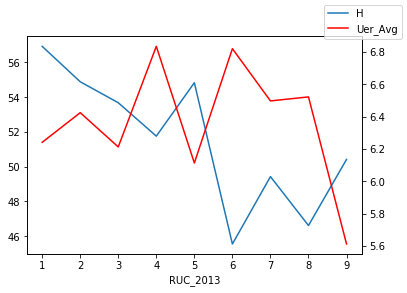

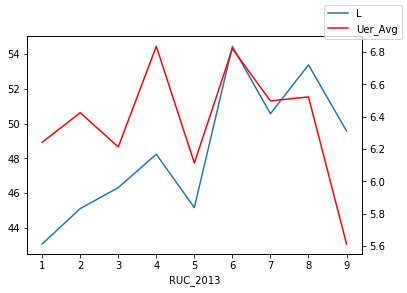

In [177]:
ax = sorted_Merge.plot(x="RUC_2013", y="H", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

ax = sorted_Merge.plot(x="RUC_2013", y="L", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

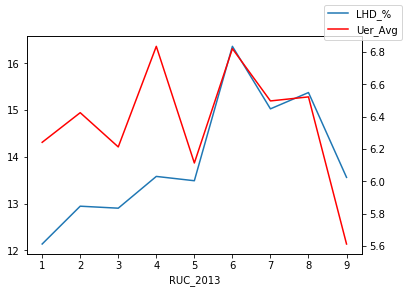

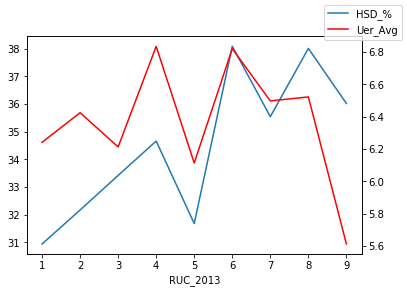

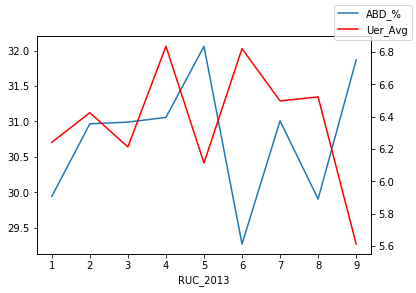

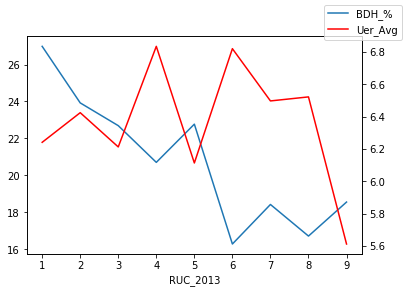

In [178]:
import matplotlib.pyplot as plt

# ABD.plot(ax=plt.gca()) #no need to specify for first axis
ax = sorted_Merge.plot(x="RUC_2013", y="LHD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

import matplotlib.pyplot as plt

# ABD.plot(ax=plt.gca()) #no need to specify for first axis
ax = sorted_Merge.plot(x="RUC_2013", y="HSD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

import matplotlib.pyplot as plt

# ABD.plot(ax=plt.gca()) #no need to specify for first axis
ax = sorted_Merge.plot(x="RUC_2013", y="ABD_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

import matplotlib.pyplot as plt

# ABD.plot(ax=plt.gca()) #no need to specify for first axis
ax = sorted_Merge.plot(x="RUC_2013", y="BDH_%", legend=False)
ax2 = ax.twinx()
sorted_Merge.plot(x="RUC_2013", y="Uer_Avg", ax=ax2, legend=False, color="r")
ax.figure.legend()

In [179]:
# convert columns from object to numeric
merge_df[['RUC_2013','Metro_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']] = merge_df[['RUC_2013','Metro_2013','Uer_Avg', 'ABD_%', 'LHD_%', 'HSD_%', 'BDH_%']].apply(pd.to_numeric)
Unemp = merge_df.groupby('Metro_2013')['Uer_Avg'].mean()
ABD = merge_df.groupby('Metro_2013')['ABD_%'].mean()
LHD = merge_df.groupby('Metro_2013')['LHD_%'].mean()
HSD = merge_df.groupby('Metro_2013')['HSD_%'].mean()
BDH = merge_df.groupby('Metro_2013')['BDH_%'].mean()
sorted_Merge = pd.concat([ABD, LHD], axis=1)

# converting series objects to dataframes
Unemp = Unemp.to_frame().reset_index()
ABD = ABD.to_frame().reset_index()
LHD = LHD.to_frame().reset_index()
HSD = HSD.to_frame().reset_index()
BDH = BDH.to_frame().reset_index()
sorted_Merge = pd.concat([Unemp, LHD.iloc[:,1], HSD.iloc[:,1],ABD.iloc[:,1], BDH.iloc[:,1] ], axis=1)

In [180]:
sorted_Merge.head()
sorted_Merge = sorted_Merge.drop(['Metro_2013'],axis=1)

In [181]:
sorted_Merge = sorted_Merge.T
sorted_Merge.head()

,0,1
Uer_Avg,6.431111,6.293218
LHD_%,14.933275,12.642436
HSD_%,36.403012,32.121402
ABD_%,30.593453,30.609344
BDH_%,18.070254,24.626825


In [182]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 17 columns):
FIPS code       2972 non-null object
State           2972 non-null object
Area_name       2972 non-null object
RUC_2013        2972 non-null int64
UIC_2013        2972 non-null int64
Metro_2013      2972 non-null int64
Uer_2012        2972 non-null float64
Uer_2013        2972 non-null float64
Uer_2014        2972 non-null float64
Uer_2015        2972 non-null float64
Uer_2016        2972 non-null float64
Medi_inc2016    2972 non-null object
Uer_Avg         2972 non-null float64
LHD_%           2972 non-null float64
HSD_%           2972 non-null float64
ABD_%           2972 non-null float64
BDH_%           2972 non-null float64
dtypes: float64(10), int64(3), object(4)
memory usage: 394.8+ KB


In [213]:
#correlation coefficients

print("Uer_Avgmerge_df['Uer_Avg'].corr(merge_df['LHD_%']))

print(merge_df['Uer_Avg'].corr(merge_df['HSD_%']))

print(merge_df['Uer_Avg'].corr(merge_df['ABD_%']))

print(merge_df['Uer_Avg'].corr(merge_df['BDH_%']))

0.45045726230773625
0.22589841462267535
-0.2625479025171342
-0.3613208389632496


In [187]:
merge_df['UIC_2013'].corr(merge_df['LHD_%'])

0.09323988398678294

In [188]:
merge_df['UIC_2013'].corr(merge_df['HSD_%'])

0.21129943152594313

In [189]:
merge_df['UIC_2013'].corr(merge_df['ABD_%'])

0.0936859248433163

In [190]:
merge_df['UIC_2013'].corr(merge_df['BDH_%'])

-0.291888494795983

In [191]:
merge_df['RUC_2013'].corr(merge_df['LHD_%'])

0.14958685494946486

In [192]:
merge_df['RUC_2013'].corr(merge_df['HSD_%'])

0.3112689420149645

In [193]:
merge_df['RUC_2013'].corr(merge_df['ABD_%'])

0.03692597137394991

In [194]:
merge_df['RUC_2013'].corr(merge_df['BDH_%'])

-0.3803940774107399

In [195]:
merge_df['Metro_2013'].corr(merge_df['BDH_%'])

0.385688698021416

In [212]:
# print(merge_df['Metro_2013'].corr(merge_df['LHD_%']))
# print(merge_df['Metro_2013'].corr(merge_df['HSD_%']))
# print(merge_df['Metro_2013'].corr(merge_df['ABD_%']))
# print(merge_df['Metro_2013'].corr(merge_df['BDH_%']))

-0.18201210964696396
-0.3158420236219596
0.0016111543035478692
0.385688698021416


In [197]:
merge_national.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,...,Medi_inc2016,Uer_Avg,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
0,00000,US,United States,NaN,NaN,NaN,8.070362,7.375232,6.168215,5.28368,...,NaN,6.353336,27818380,58820411,62242569,64767787,13.021,27.531,29.1331,30.315


In [198]:
merge_LC.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,...,Medi_inc2016,Uer_Avg,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
0,42077,PA,"Lehigh County, PA",2,2,1,8.5,7.8,6.1,5.3,...,105.9,6.6,29113,81306,63001,70517,11.935,33.331,25.8268,28.9079


In [199]:
merge_NC.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,...,Medi_inc2016,Uer_Avg,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
0,42095,PA,"Northampton County, PA",2,2,1,8.1,7.4,5.9,5.3,...,115.5,6.38,19950,73199,57102,58066,9.577,35.138,27.4111,27.8739


In [200]:
merge_PA.head()

,FIPS code,State,Area_name,RUC_2013,UIC_2013,Metro_2013,Uer_2012,Uer_2013,Uer_2014,Uer_2015,...,Medi_inc2016,Uer_Avg,LHD,HSD,ABD,BDH,LHD_%,HSD_%,ABD_%,BDH_%
0,42000,PA,Pennsylvania,NaN,NaN,NaN,7.8,7.4,5.9,5.3,...,100,6.36,925686,3183249,2144961,2595950,10.46,35.97,24.2373,29.3333


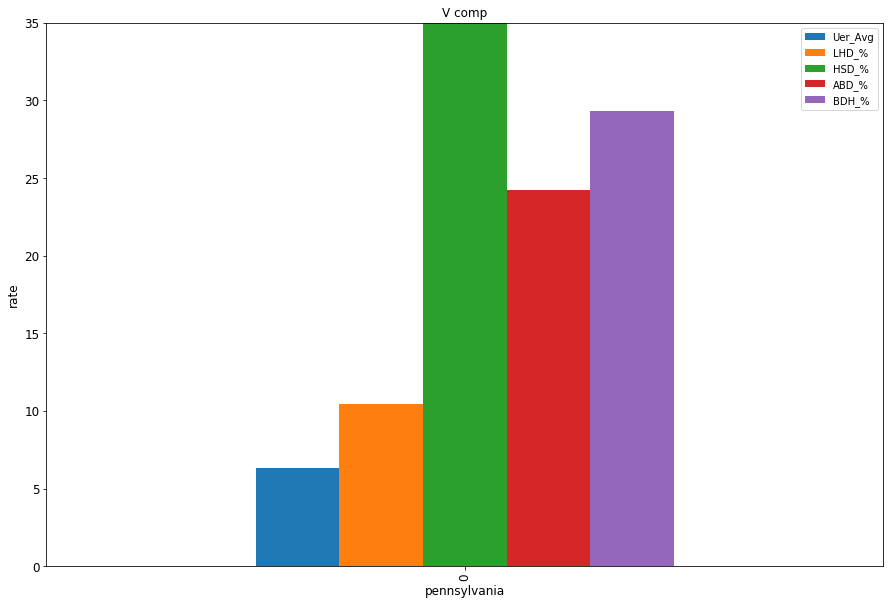

In [201]:


import matplotlib.pyplot as plt
ax = merge_PA[['Uer_Avg','LHD_%', 'HSD_%','ABD_%','BDH_%']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("pennsylvania", fontsize=12)
ax.set_ylabel("rate", fontsize=12)
ax.set_ylim([0,35])
plt.show()

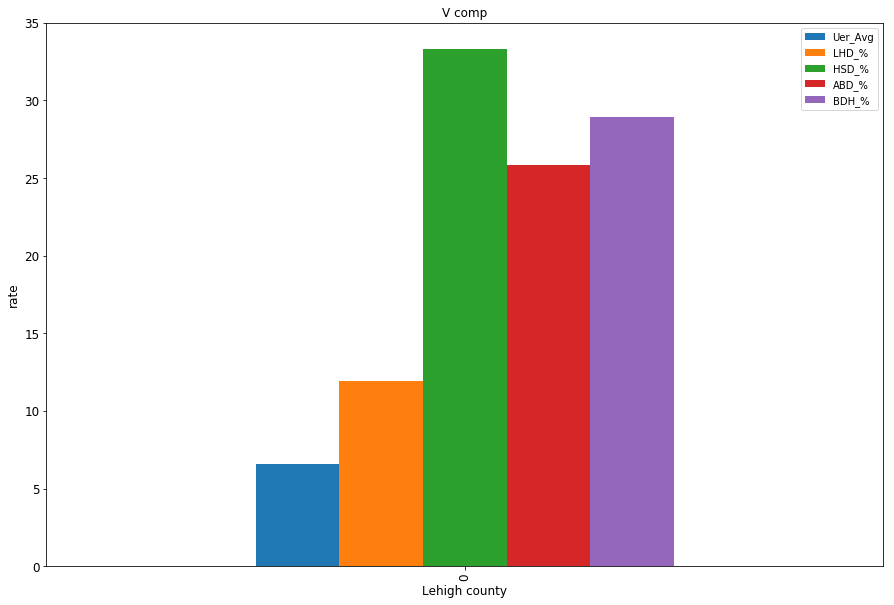

In [202]:
import matplotlib.pyplot as plt
ax = merge_LC[['Uer_Avg','LHD_%', 'HSD_%','ABD_%','BDH_%']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Lehigh county", fontsize=12)
ax.set_ylabel("rate", fontsize=12)
ax.set_ylim([0,35])
plt.show()

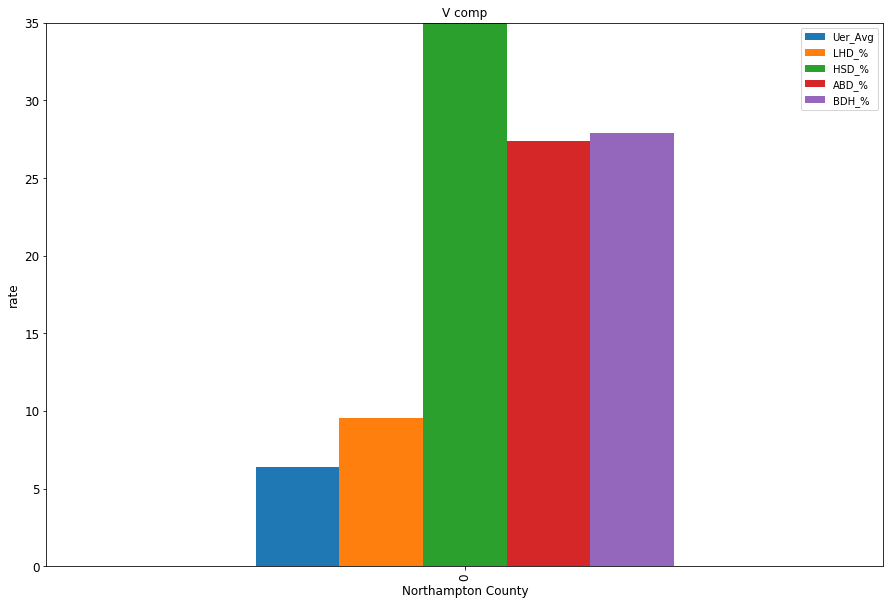

In [203]:
import matplotlib.pyplot as plt
ax = merge_NC[['Uer_Avg','LHD_%', 'HSD_%','ABD_%','BDH_%']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Northampton County", fontsize=12)
ax.set_ylabel("rate", fontsize=12)
ax.set_ylim([0,35])
plt.show()

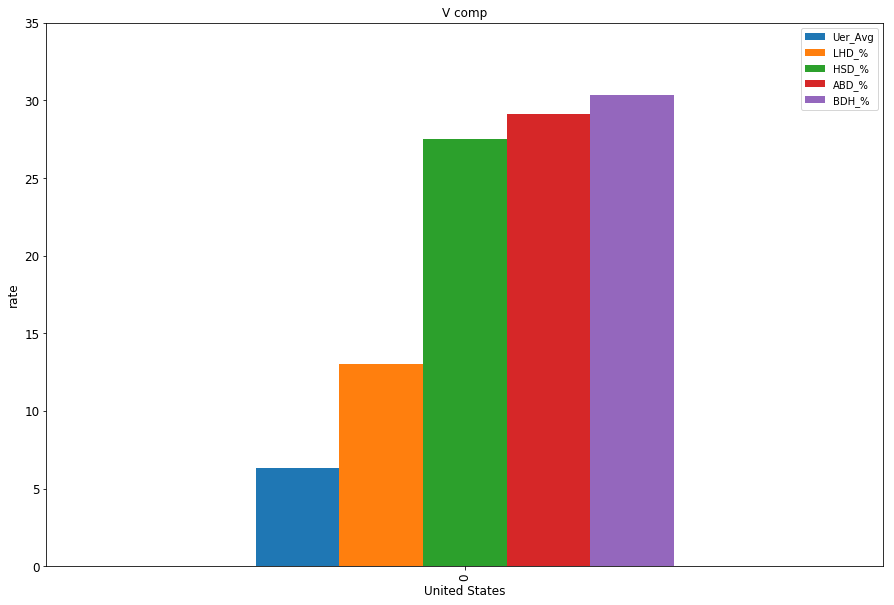

In [204]:
import matplotlib.pyplot as plt
ax = merge_national[['Uer_Avg','LHD_%', 'HSD_%','ABD_%','BDH_%']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("United States", fontsize=12)
ax.set_ylabel("rate", fontsize=12)
ax.set_ylim([0,35])
plt.show()

In [205]:
result= pd.concat([merge_national, merge_PA, merge_LC, merge_NC])

In [206]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 0
Data columns (total 21 columns):
FIPS code       4 non-null object
State           4 non-null object
Area_name       4 non-null object
RUC_2013        2 non-null object
UIC_2013        2 non-null object
Metro_2013      2 non-null object
Uer_2012        4 non-null float64
Uer_2013        4 non-null float64
Uer_2014        4 non-null float64
Uer_2015        4 non-null float64
Uer_2016        4 non-null float64
Medi_inc2016    3 non-null object
Uer_Avg         4 non-null float64
LHD             4 non-null object
HSD             4 non-null object
ABD             4 non-null object
BDH             4 non-null object
LHD_%           4 non-null object
HSD_%           4 non-null object
ABD_%           4 non-null object
BDH_%           4 non-null object
dtypes: float64(6), object(15)
memory usage: 704.0+ bytes


In [207]:
result = result[['Area_name', 'Uer_Avg', 'LHD_%', 'HSD_%', 'ABD_%', 'BDH_%']]

In [208]:
result

,Area_name,Uer_Avg,LHD_%,HSD_%,ABD_%,BDH_%
0,United States,6.353336,13.021,27.531,29.1331,30.315
0,Pennsylvania,6.360000,10.46,35.97,24.2373,29.3333
0,"Lehigh County, PA",6.600000,11.935,33.331,25.8268,28.9079
0,"Northampton County, PA",6.380000,9.577,35.138,27.4111,27.8739


In [209]:
result = result.sort_values('Uer_Avg',ascending=False)

In [210]:
result

,Area_name,Uer_Avg,LHD_%,HSD_%,ABD_%,BDH_%
0,"Lehigh County, PA",6.600000,11.935,33.331,25.8268,28.9079
0,"Northampton County, PA",6.380000,9.577,35.138,27.4111,27.8739
0,Pennsylvania,6.360000,10.46,35.97,24.2373,29.3333
0,United States,6.353336,13.021,27.531,29.1331,30.315
